## Importing Python Libraries

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

## Exploratory Data Analysis

### Populating Source Data
* zone_file_path - This variable sets the path of the zone file having the zone information of the geography
* parcel_file_path - This variable sets the path of the parcel/lot file having the parcels information of the geography
* building_footprints_path - This variable sets the path of the building footprints file having the building footprints information of the geography


In [2]:
zone_file_path = './brisbane_zoning.json'
commercial_zones_list_file_path = './commercial_zones.csv'
parcel_file_path = './Property_boundaries_parcel.geojson'
buildings_address_site_geocode_file_path = './QLD_ADDRESS_SITE_GEOCODE_psv.psv'
buildings_address_detail_file_path = './QLD_ADDRESS_DETAIL_psv.psv'
building_footprints_path = './brisbane_buildings.geojson'

#### Fetching Zones
Land is divided into zones. These zones guide the land use or type of development that may occur on a site.

https://www.data.brisbane.qld.gov.au/data/dataset/city-plan-2014-zoning-overlay

In [3]:
zones_gdf = gpd.read_file(zone_file_path)

#### Preview Zones

In [4]:
zones_gdf.head()

,id,OBJECTID,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry
0,0,1696986,1000,NaN,District,District,Sport and recreation,Sport and recreation (District),NaN,NaN,NaN,1.375315e+12,NaN,SR,2.0,SR2 - Sport and recreation (District),49516.641357,930.380616,"POLYGON ((153.02181 -27.41638, 153.02180 -27.4..."
1,1,1696987,1000,NaN,District,District,Centre,District centre (District),NaN,NaN,NaN,1.375315e+12,NaN,DC,1.0,DC1 - District,3100.400146,241.141857,"POLYGON ((153.02572 -27.53300, 153.02567 -27.5..."
2,2,1696988,1000,NaN,Local,Local,Recreation and open space,Open space (Local),NaN,NaN,NaN,1.375315e+12,NaN,OS,1.0,OS1 - Open space (Local),1214.078857,140.818243,"POLYGON ((153.02905 -27.53102, 153.02893 -27.5..."
3,3,1696989,1000,NaN,NaN,NaN,General residential,Low density residential,NaN,NaN,NaN,1.375315e+12,NaN,LDR,NaN,LDR - Low density residential,2868.177490,238.623531,"POLYGON ((153.08420 -27.57488, 153.08419 -27.5..."
4,4,1696990,1000,NaN,NaN,NaN,General residential,Low density residential,NaN,NaN,NaN,1.375315e+12,NaN,LDR,NaN,LDR - Low density residential,18846.690186,641.434514,"POLYGON ((153.03191 -27.55776, 153.03186 -27.5..."


#### Zones Attributes Information

In [5]:
zones_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 26188 entries, 0 to 26187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              26188 non-null  object  
 1   OBJECTID        26188 non-null  int64   
 2   LGA_CODE        26188 non-null  int64   
 3   NP              0 non-null      float64 
 4   NP_PREC         11080 non-null  object  
 5   ZONE_PREC       11136 non-null  object  
 6   LVL1_ZONE       26188 non-null  object  
 7   LVL2_ZONE       26188 non-null  object  
 8   LOT_PLAN        0 non-null      float64 
 9   GAZ_DATE        0 non-null      float64 
 10  AMD_DATE        0 non-null      float64 
 11  CAD_VER         21862 non-null  float64 
 12  PAR_SPLIT       0 non-null      float64 
 13  ZONE_CODE       26188 non-null  object  
 14  ZONE_PREC_NO    11957 non-null  float64 
 15  ZONE_PREC_DESC  26188 non-null  object  
 16  Shape__Area     26188 non-null  float64 
 17  Shap

#### Zone File Analysis
* OBJECTID is unique identifier
* LVL2_ZONE is the attribute, we will use to filter the zones as commercial zones
* LOT_PLAN values are all nulls. This has to be cleaned for processing later.
* geometry is the spatial attribute. All records have spatial data.

#### Fetching Parcels
Land Parcels are the building blocks of Council properties. Land parcels (also called lots) are mapped and the title details shown on a Plan of Subdivision. The parcel is a graphical representation of surveyed boundaries together with identifiers such as Lot/Plan description and house numbers.

https://www.data.brisbane.qld.gov.au/data/dataset/property-boundaries-parcel

In [6]:
parcels_gdf = gpd.read_file(parcel_file_path)

#### Preview Parcels

In [7]:
parcels_gdf.head()

,OBJECTID,LOT,PLAN_,LOTPLAN,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,geometry
0,428983153,J,SP163210,JSP163210,52112,516,52112516,0,Lot,513.0,0.0,0.0,Y,EA,Easement,BRISBANE CITY,NaN,NaN,MOUNT CROSBY,E,EASEMENT,E,EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001101,4.691152e-08,"MULTIPOLYGON (((152.82201 -27.51885, 152.82201..."
1,428983154,K,SP163210,KSP163210,52112,517,52112517,0,Lot,352.0,0.0,0.0,Y,EA,Easement,BRISBANE CITY,NaN,NaN,MOUNT CROSBY,E,EASEMENT,E,EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001186,3.216066e-08,"MULTIPOLYGON (((152.82245 -27.51907, 152.82245..."
2,428983155,L,SP163210,LSP163210,52112,518,52112518,0,Lot,629.0,0.0,0.0,Y,EA,Easement,BRISBANE CITY,NaN,NaN,MOUNT CROSBY,E,EASEMENT,E,EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001212,5.753683e-08,"MULTIPOLYGON (((152.82294 -27.51912, 152.82294..."
3,428983156,M,SP163210,MSP163210,52112,519,52112519,0,Lot,742.0,0.0,0.0,Y,EA,Easement,BRISBANE CITY,NaN,NaN,MOUNT CROSBY,E,EASEMENT,E,EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001267,6.781334e-08,"MULTIPOLYGON (((152.82343 -27.51926, 152.82343..."
4,428983157,N,SP163210,NSP163210,52112,520,52112520,0,Lot,995.0,0.0,0.0,Y,EA,Easement,BRISBANE CITY,NaN,NaN,MOUNT CROSBY,E,EASEMENT,E,EASEMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001639,9.100414e-08,"MULTIPOLYGON (((152.82427 -27.51950, 152.82427..."


#### Parcel Attributes Information




In [8]:
parcels_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 879030 entries, 0 to 879029
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   OBJECTID                879030 non-null  int64              
 1   LOT                     808146 non-null  object             
 2   PLAN_                   808146 non-null  object             
 3   LOTPLAN                 808146 non-null  object             
 4   SEG_NUM                 879030 non-null  int64              
 5   PAR_NUM                 879030 non-null  int64              
 6   SEGPAR                  879030 non-null  int64              
 7   PAR_IND                 879030 non-null  int64              
 8   PAR_IND_DESC            879030 non-null  object             
 9   LOT_AREA                879030 non-null  float64            
 10  EXCL_AREA               598458 non-null  float64            
 11  LOT_VOLUME        

#### Parcel Analysis

* OBJECTID is unique identifier
* geometry is spatial data

#### Fetching Building Footprints
A building footprint is a polygon, or set of polygons, representing a specific building in the physical world. It provides a ground-centered visual representation of a building’s location, shape, dimensions, and area. It may also include other geospatial information as well.

This information can include:

* Address: address strings that include attributes such as street number and name, city, state, and ZIP code.
* Latitude/longitude: geographic coordinates that allow locations to be geocoded and mapped.
* Place: a categorical attribute that describes a building’s general purpose (e.g. residential, commercial, or industrial) and/or its specific use case (e.g. an electronics store).
* Spatial hierarchy: metadata that provides information about individual units within buildings (e.g. apartments, stores in malls, or offices in business complexes), and how they are spatially related to both each other and the building that contains them.

https://github.com/microsoft/AustraliaBuildingFootprints

In [9]:
buildings_gdf = gpd.read_file(building_footprints_path)

#### Preview Buildings

In [10]:
buildings_gdf.head()

,geometry
0,"POLYGON ((138.04156 -22.04061, 138.04164 -22.0..."
1,"POLYGON ((138.11860 -19.91835, 138.11860 -19.9..."
2,"POLYGON ((138.09566 -17.99759, 138.09572 -17.9..."
3,"POLYGON ((138.31646 -21.61021, 138.31649 -21.6..."
4,"POLYGON ((138.31533 -18.53612, 138.31544 -18.5..."


#### Buildings Attribute Information

In [11]:
buildings_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2498411 entries, 0 to 2498410
Data columns (total 1 columns):
 #   Column    Dtype   
---  ------    -----   
 0   geometry  geometry
dtypes: geometry(1)
memory usage: 19.1 MB


#### Fetching building addresses

GNAF Link

In [12]:
address_detail_df = pd.read_csv(buildings_address_detail_file_path, delimiter='|',low_memory=False)
address_site_df = pd.read_csv(buildings_address_site_geocode_file_path, delimiter='|')
merged_address_detail_df = pd.merge(address_detail_df, address_site_df, on='ADDRESS_SITE_PID', how='right')
merged_address_gdf = gpd.GeoDataFrame(
merged_address_detail_df, geometry=gpd.points_from_xy(merged_address_detail_df["LONGITUDE"], merged_address_detail_df["LATITUDE"]))
merged_address_gdf.crs = 'EPSG:4326'

#### Preview Building Addresses

In [13]:
merged_address_gdf.head()

,ADDRESS_DETAIL_PID,DATE_CREATED_x,DATE_LAST_MODIFIED,DATE_RETIRED_x,BUILDING_NAME,LOT_NUMBER_PREFIX,LOT_NUMBER,LOT_NUMBER_SUFFIX,FLAT_TYPE_CODE,FLAT_NUMBER_PREFIX,FLAT_NUMBER,FLAT_NUMBER_SUFFIX,LEVEL_TYPE_CODE,LEVEL_NUMBER_PREFIX,LEVEL_NUMBER,LEVEL_NUMBER_SUFFIX,NUMBER_FIRST_PREFIX,NUMBER_FIRST,NUMBER_FIRST_SUFFIX,NUMBER_LAST_PREFIX,NUMBER_LAST,NUMBER_LAST_SUFFIX,STREET_LOCALITY_PID,LOCATION_DESCRIPTION,LOCALITY_PID,ALIAS_PRINCIPAL,POSTCODE,PRIVATE_STREET,LEGAL_PARCEL_ID,CONFIDENCE,ADDRESS_SITE_PID,LEVEL_GEOCODED_CODE,PROPERTY_PID,GNAF_PROPERTY_PID,PRIMARY_SECONDARY,ADDRESS_SITE_GEOCODE_PID,DATE_CREATED_y,DATE_RETIRED_y,GEOCODE_SITE_NAME,GEOCODE_SITE_DESCRIPTION,GEOCODE_TYPE_CODE,RELIABILITY_CODE,BOUNDARY_EXTENT,PLANIMETRIC_ACCURACY,ELEVATION,LONGITUDE,LATITUDE,geometry
0,GAQLD157585516,2009-01-21,2021-07-07,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,QLD166624,NaN,loc6de9037e8978,P,4017,NaN,1/RP148996,2,157575857,7,NaN,1179000.0,NaN,ACS157575857,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.031303,-27.319103,POINT (153.03130 -27.31910)
1,GAQLD157585528,2009-01-21,2021-07-07,NaN,NaN,NaN,718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,228.0,NaN,NaN,NaN,NaN,QLD166475,NaN,loc6de9037e8978,P,4017,NaN,718/RP125928,2,157575869,7,NaN,1177580.0,NaN,ACS157575869,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.034975,-27.318490,POINT (153.03498 -27.31849)
2,GAQLD157585562,2010-01-26,2021-07-07,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,NaN,QLD166259,NaN,loc47f8e7673683,P,4680,NaN,2/RP618221,2,157575903,7,NaN,815056.0,NaN,ACS157575903,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,151.324703,-23.957141,POINT (151.32470 -23.95714)
3,GAQLD157585572,2010-01-27,2021-07-07,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0,NaN,NaN,NaN,NaN,QLD166242,NaN,loc47f8e7673683,P,4680,NaN,19/RP895863,2,157575913,7,NaN,4127716.0,NaN,ACS157575913,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,151.341844,-23.959830,POINT (151.34184 -23.95983)
4,GAQLD157585575,2010-01-27,2021-07-07,NaN,NaN,NaN,264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,QLD166280,NaN,loc47f8e7673683,P,4680,NaN,264/RP889904,2,157575916,7,NaN,4125778.0,NaN,ACS157575916,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,151.349176,-23.950211,POINT (151.34918 -23.95021)


#### Building Addresses Attributes Information

* GNAF - Address Site Geocode and Address Detail Information

In [14]:
merged_address_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3293887 entries, 0 to 3293886
Data columns (total 48 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   ADDRESS_DETAIL_PID        object  
 1   DATE_CREATED_x            object  
 2   DATE_LAST_MODIFIED        object  
 3   DATE_RETIRED_x            float64 
 4   BUILDING_NAME             object  
 5   LOT_NUMBER_PREFIX         float64 
 6   LOT_NUMBER                object  
 7   LOT_NUMBER_SUFFIX         object  
 8   FLAT_TYPE_CODE            object  
 9   FLAT_NUMBER_PREFIX        object  
 10  FLAT_NUMBER               float64 
 11  FLAT_NUMBER_SUFFIX        object  
 12  LEVEL_TYPE_CODE           object  
 13  LEVEL_NUMBER_PREFIX       object  
 14  LEVEL_NUMBER              float64 
 15  LEVEL_NUMBER_SUFFIX       object  
 16  NUMBER_FIRST_PREFIX       float64 
 17  NUMBER_FIRST              float64 
 18  NUMBER_FIRST_SUFFIX       object  
 19  NUMBER_LAST_PREFIX        float64 

#### Building Address Data Analysis

### Verify Source Spatial Data Are In Same Projection

In [15]:
def check_projections_are_same(zones_gdf, parcels_gdf, buildings_gdf):
    return zones_gdf.crs == parcels_gdf.crs == buildings_gdf.crs == merged_address_gdf.crs

if(check_projections_are_same(zones_gdf, parcels_gdf, buildings_gdf)):
    print("All source spatial files are in same CRS")
else:
    source_spatial = [zones_gdf,parcels_gdf,buildings_gdf,merged_address_gdf]
    for source in source_spatial:
        if source.crs != 'EPSG:4326':
            source.crs = 'EPSG:4326'

All source spatial files are in same CRS


### Handling Missing Data

In [16]:
#TODO

### Handling Invalid Geometries

## Commercial Zones
- Read commercial zones from a CSV file using Pandas and store them as a DataFrame.

In [17]:
commercial_zones = pd.read_csv(commercial_zones_list_file_path)
commercial_zones

,Zones
0,District centre (Corridor)
1,District centre (District)
2,General industry A
3,General industry B
4,General industry C
5,Industry investigation
6,Low impact industry
7,Major centre
8,Mixed use (Centre frame)
9,Mixed use (Corridor)


## Filtering Commercial Zones

In [18]:
commercial_zones_gdf = zones_gdf[zones_gdf['LVL2_ZONE'].isin(commercial_zones['Zones'])]

### Preview Commercial Zones

In [19]:
commercial_zones_gdf.head()

,id,OBJECTID,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry
1,1,1696987,1000,NaN,District,District,Centre,District centre (District),NaN,NaN,NaN,1.375315e+12,NaN,DC,1.0,DC1 - District,3100.400146,241.141857,"POLYGON ((153.02572 -27.53300, 153.02567 -27.5..."
16,16,1697002,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,2592.304443,232.037958,"POLYGON ((152.98350 -27.41785, 152.98318 -27.4..."
21,21,1697007,1000,NaN,District,District,Centre,District centre (District),NaN,NaN,NaN,1.375315e+12,NaN,DC,1.0,DC1 - District,4776.921631,421.943831,"POLYGON ((152.99888 -27.45956, 152.99848 -27.4..."
55,55,1697041,1000,NaN,NaN,NaN,Industry,General industry C,NaN,NaN,NaN,1.375315e+12,NaN,IN,3.0,IN3 - General industry C,34522.822754,765.204578,"POLYGON ((153.06357 -27.37042, 153.06350 -27.3..."
67,67,1697053,1000,NaN,District,District,Centre,District centre (District),NaN,NaN,NaN,1.375315e+12,NaN,DC,1.0,DC1 - District,3867.472412,269.223641,"POLYGON ((153.01406 -27.47933, 153.01366 -27.4..."


In [20]:
print("Count of commercial zones : " ,len(commercial_zones_gdf))

Count of commercial zones :  2514


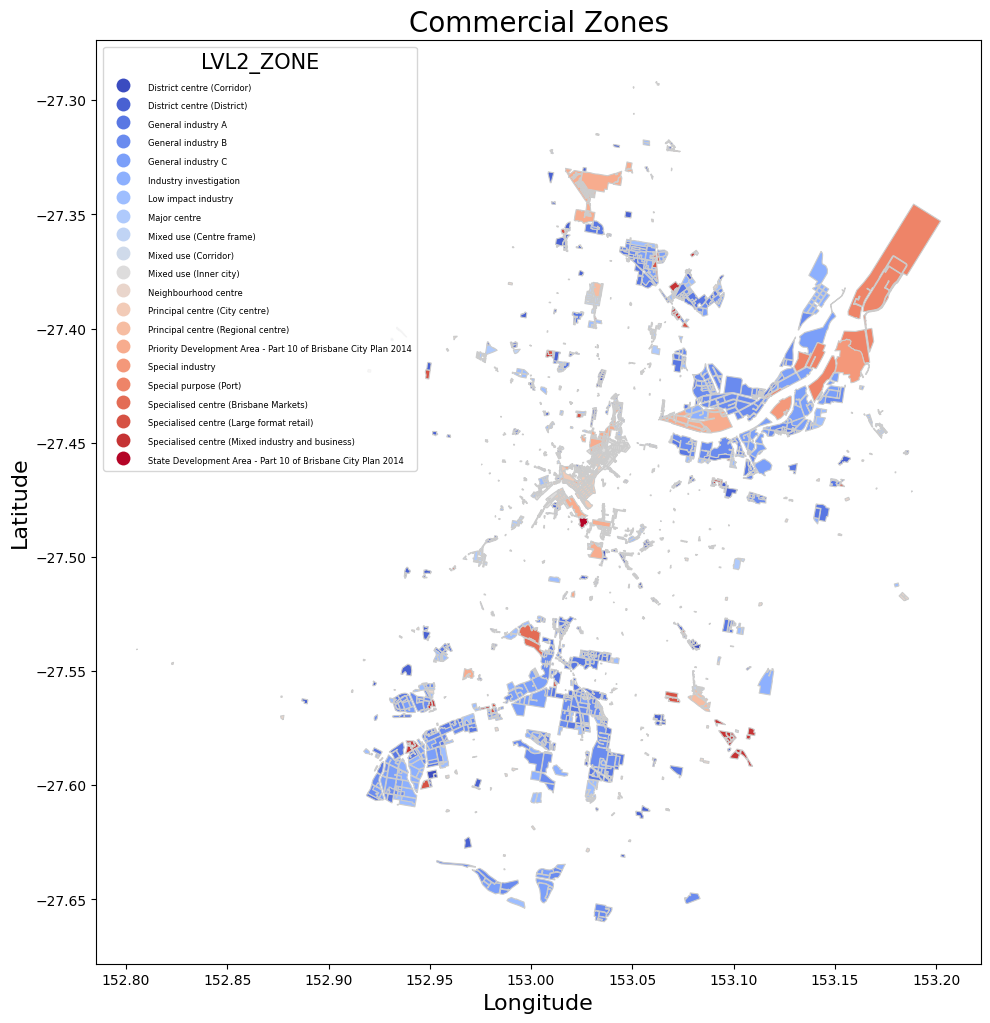

In [22]:


# Set the size of the plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the GeoDataFrame with the specified column and legend
commercial_zones_gdf.plot(column='LVL2_ZONE', legend=True, ax=ax, figsize=(15, 15), cmap='coolwarm', linewidth=0.8, edgecolor='0.8')

# Customize the plot appearance
ax.set_title("Commercial Zones", fontsize=20)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)

# Get the legend object created by commercial_zones_gdf.plot()
legend = ax.get_legend()
legend.set_title('LVL2_ZONE', prop={'size': 15})  # Set the legend title and its font size
for label in legend.get_texts():
    label.set_fontsize(6)  # Set the font size of legend labels
legend.set_loc('upper left')  # Set the legend position

# Optionally, you can save the plot to a file
plt.savefig('commercial_zones_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## Filtering Commercial Parcels

In [21]:
def filter_commercial_parcels(parcels_gdf,commercial_zones_gdf):
    # Spatial Intersect between Commercial Zones and Parcels
    commercial_parcels = gpd.overlay(parcels_gdf,commercial_zones_gdf ,how='intersection',keep_geom_type=False)

    # Assigning new Attribute COMMERCIAL_PARCEL
    commercial_parcels['COMMERCIAL_PARCEL'] = 'Y'

    # Assigning new Attribute AL_LID as concatenation of 'AL', Commercial Parcel ID (OBJECTID)
    commercial_parcels['AL_LID'] = 'AL' + commercial_parcels['OBJECTID_1'].astype(str)
    
    return commercial_parcels

In [22]:
commercial_parcels_gdf = filter_commercial_parcels(parcels_gdf,commercial_zones_gdf)

## Preview Commercial Parcels

In [23]:
commercial_parcels_gdf

,OBJECTID_1,LOT,PLAN_,LOTPLAN,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_PARCEL,AL_LID
0,428983201,NaN,NaN,NaN,18072,81,18072081,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,WYNNUM ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004005,5.180885e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12577 -27.47447, 153.12557 -27.4...",Y,AL428983201
1,428986693,NaN,NaN,NaN,18072,345,18072345,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002248,1.471999e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12635 -27.47389, 153.12604 -27.4...",Y,AL428986693
2,429015502,NaN,NaN,NaN,18445,84,18445084,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,TENBAR STREET WYNNUM ROAD,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001518,1.470721e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"MULTIPOLYGON (((153.12557 -27.47445, 153.12557...",Y,AL429015502
3,429015545,NaN,NaN,NaN,18445,86,18445086,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,ROAD GORHAM STREET TENBAR STREET,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001022,6.244607e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12556 -27.47396, 153.12556 -27.4...",Y,AL429015545
4,429015549,NaN,NaN,NaN,18445,89,18445089,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,TENBAR STREET,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001265,8.632476e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12556 -27.47396, 153.12549 -27.4...",Y,AL429015549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184630,429597127,1,RP97188,1RP97188,20141,7,20141007,0,Lot,16590.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,NaN,NaN,COOPERS PLAINS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10573848.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 21:09:47+00:00,NaT,16593.0,NaN,NaN,NaN,NaN,620800.

In [24]:
# commercial_zones_gdf.geometry.intersects(commercial_parcels_gdf.geometry[0]).unique()


In [25]:
print("Count of Commercial Parcels - ", len(commercial_parcels_gdf))

Count of Commercial Parcels -  184635


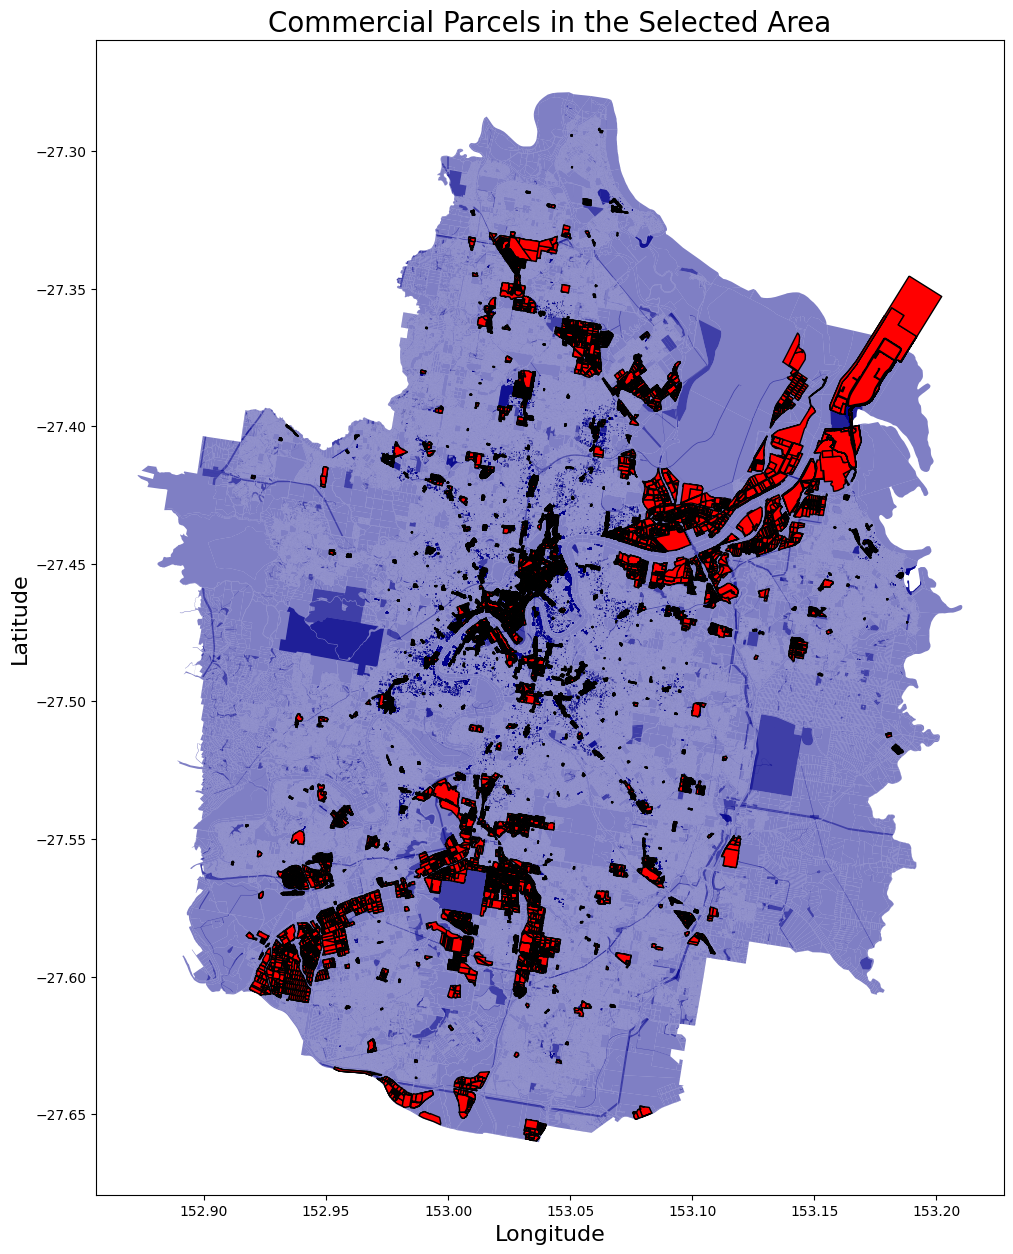

In [26]:
basemap = parcels_gdf.cx[152.9:153.2, :].plot(color='darkblue', alpha = 0.5, figsize=(15, 15))
basemap = commercial_parcels_gdf.cx[152.9:153.2, :].plot(ax=basemap, color='red', edgecolor='k')
# Add title and axis labels
plt.title("Commercial Parcels in the Selected Area", fontsize=20)  # Set the plot title
plt.xlabel("Longitude", fontsize=16)  # Set the x-axis label
plt.ylabel("Latitude", fontsize=16)  # Set the y-axis label

# Show the plot
plt.show()

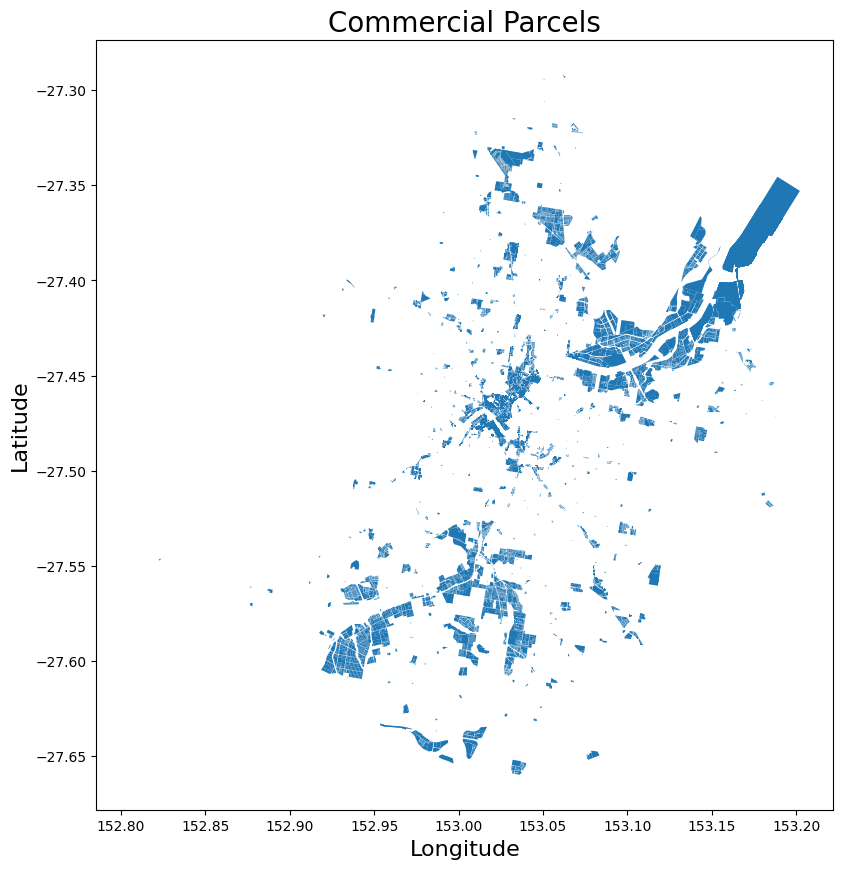

In [27]:
commercial_parcels_gdf.plot(figsize=(10,10))
# Add title and axis labels
plt.title("Commercial Parcels", fontsize=20)  # Set the plot title
plt.xlabel("Longitude", fontsize=16)  # Set the x-axis label
plt.ylabel("Latitude", fontsize=16)  # Set the y-axis label

# Show the plot
plt.show()

## Filtering Commercial Buildings

In [28]:
def filter_commercial_buildings(buildings_gdf,commercial_zones_gdf):
    
    # Spatial intersection between buildings and commercial zones
    commercial_buildings= gpd.overlay(buildings_gdf,commercial_zones_gdf ,how='intersection')

    # Assigning new attribute COMMERCIAL_BUILDINGS
    commercial_buildings['COMMERCIAL_BUILDINGS'] = 'Y'
    return commercial_buildings

In [29]:
commercial_buildings_gdf = filter_commercial_buildings(buildings_gdf,commercial_zones_gdf)

## Preview Commercial Buildings

In [30]:
commercial_buildings_gdf.head()

,id,OBJECTID,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_BUILDINGS
0,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.86499,1587.801728,"POLYGON ((152.94142 -27.58992, 152.94156 -27.5...",Y
1,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.86499,1587.801728,"POLYGON ((152.94329 -27.58928, 152.94323 -27.5...",Y
2,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.86499,1587.801728,"POLYGON ((152.94125 -27.58984, 152.94136 -27.5...",Y
3,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.86499,1587.801728,"MULTIPOLYGON (((152.94536 -27.58809, 152.94532...",Y
4,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.86499,1587.801728,"POLYGON ((152.94051 -27.59008, 152.94052 -27.5...",Y


In [31]:
print("Count of commercial buildings - ", len(commercial_buildings_gdf))

Count of commercial buildings -  16478


Bounds: [152.79994799 -27.50104911 153.20041627 -27.29973149]
y_coord: -27.400390301673077


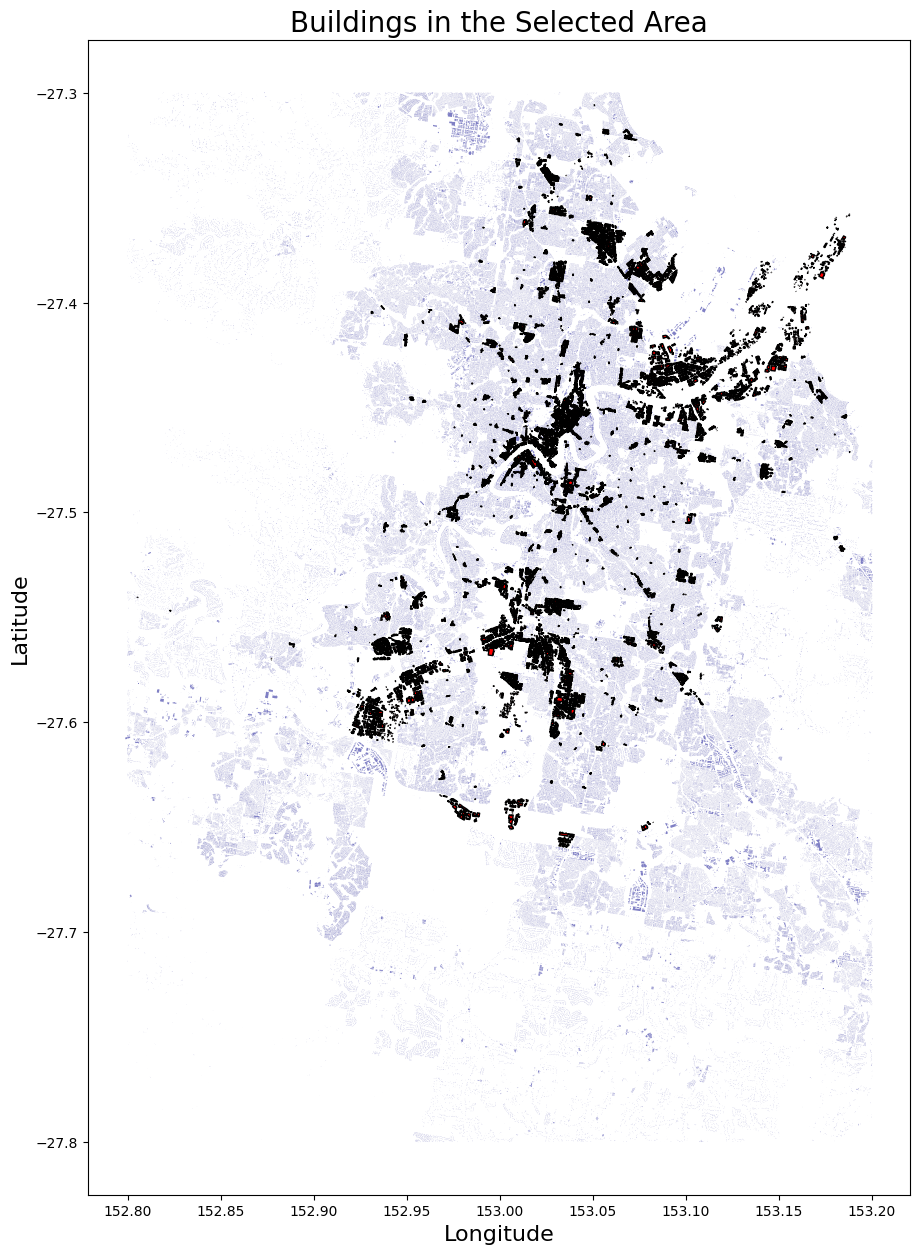

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate latitude and longitude span
bounds = buildings_gdf.cx[152.8:153.2, -27.5:-27.3].total_bounds
print("Bounds:", bounds)

# Calculate y_coord
y_coord = np.mean([bounds[1], bounds[3]])
print("y_coord:", y_coord)

# Create the plot with specified aspect ratio
fig, ax = plt.subplots(figsize=(15, 15))

# Plot the GeoDataFrames
buildings_gdf.cx[152.8:153.2, -27.8:-27.3].plot(color='darkblue', alpha=0.5, ax=ax)
commercial_buildings_gdf.cx[152.8:153.2, -27.8:-27.3].plot(color='red', edgecolor='k', ax=ax)

# Add title and axis labels
plt.title("Buildings in the Selected Area", fontsize=20)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

# Optionally, you can save the plot to a file
plt.savefig('buildings_map.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
commercial_buildings_gdf.plot(figsize=(10,10))
# Add title and axis labels
plt.title("Commercial Buildings", fontsize=20)  # Set the plot title
plt.xlabel("Longitude", fontsize=16)  # Set the x-axis label
plt.ylabel("Latitude", fontsize=16)  # Set the y-axis label

# Show the plot
plt.show()

## Filtering Commercial Addresses

In [34]:
def filter_commercial_addresses(merged_address_gdf,commercial_zones_gdf):

    # Spatial Intersection between Building Addresses and Commercial Zones
    intersection = gpd.overlay(merged_address_gdf,commercial_zones_gdf, how='intersection')

    # Assigning new attribute COMMERCIAL_ADDRESS
    intersection['COMMERCIAL_ADDRESS'] = 'Y'

    # Assigning new attribute AL_AID as concatenation of 'AL' and ADDRESS_DETAIL_PID
    intersection['AL_AID'] = 'AL' + intersection['ADDRESS_DETAIL_PID'].astype(str)
    return intersection

In [35]:
commercial_addresses = filter_commercial_addresses(merged_address_gdf,commercial_zones_gdf)

In [36]:
commercial_addresses.head()

,ADDRESS_DETAIL_PID,DATE_CREATED_x,DATE_LAST_MODIFIED,DATE_RETIRED_x,BUILDING_NAME,LOT_NUMBER_PREFIX,LOT_NUMBER,LOT_NUMBER_SUFFIX,FLAT_TYPE_CODE,FLAT_NUMBER_PREFIX,FLAT_NUMBER,FLAT_NUMBER_SUFFIX,LEVEL_TYPE_CODE,LEVEL_NUMBER_PREFIX,LEVEL_NUMBER,LEVEL_NUMBER_SUFFIX,NUMBER_FIRST_PREFIX,NUMBER_FIRST,NUMBER_FIRST_SUFFIX,NUMBER_LAST_PREFIX,NUMBER_LAST,NUMBER_LAST_SUFFIX,STREET_LOCALITY_PID,LOCATION_DESCRIPTION,LOCALITY_PID,ALIAS_PRINCIPAL,POSTCODE,PRIVATE_STREET,LEGAL_PARCEL_ID,CONFIDENCE,ADDRESS_SITE_PID,LEVEL_GEOCODED_CODE,PROPERTY_PID,GNAF_PROPERTY_PID,PRIMARY_SECONDARY,ADDRESS_SITE_GEOCODE_PID,DATE_CREATED_y,DATE_RETIRED_y,GEOCODE_SITE_NAME,GEOCODE_SITE_DESCRIPTION,GEOCODE_TYPE_CODE,RELIABILITY_CODE,BOUNDARY_EXTENT,PLANIMETRIC_ACCURACY,ELEVATION,LONGITUDE,LATITUDE,id,OBJECTID,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_ADDRESS,AL_AID
0,GAQLD157585700,2010-01-26,2021-08-13,NaN,NaN,NaN,3,NaN,UNIT,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,QLD165795,NaN,loc06f9e57188cf,P,4006,NaN,3/BUP11158,2,157576041,7,NaN,1236682.0,S,ACS157576041,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.038907,-27.446596,18666,1715652,1000,NaN,NaN,NaN,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,-2.209162e+12,NaN,PDA,2.0,"Bowen Hills Priority Development Area, refer t...",34702.796143,900.116149,POINT (153.03891 -27.44660),Y,ALGAQLD157585700
1,GAQLD157585702,2010-01-26,2021-07-07,NaN,NaN,NaN,6,NaN,UNIT,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,QLD165795,NaN,loc06f9e57188cf,P,4006,NaN,6/BUP4373,2,157576043,7,NaN,1236671.0,S,ACS157576043,2012-11-01,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.038939,-27.446805,18666,1715652,1000,NaN,NaN,NaN,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,-2.209162e+12,NaN,PDA,2.0,"Bowen Hills Priority Development Area, refer t...",34702.796143,900.116149,POINT (153.03894 -27.44681),Y,ALGAQLD157585702
2,GAQLD157585897,2015-04-24,2021-07-07,NaN,NaN,NaN,1,NaN,UNIT,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,QLD165785,NaN,loc06f9e57188cf,P,4006,NaN,1/RP87916,2,157565240,7,NaN,1236584.0,S,PC157565240,2015-04-28,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.038729,-27.444666,18666,1715652,1000,NaN,NaN,NaN,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,-2.209162e+12,NaN,PDA,2.0,"Bowen Hills Priority Development Area, refer t...",34702.796143,900.116149,POINT (153.03873 -27.44467),Y,ALGAQLD157585897
3,GAQLD157585899,2015-04-24,2021-07-07,NaN,NaN,NaN,38,NaN,UNIT,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,QLD165795,NaN,loc06f9e57188cf,P,4006,NaN,38/RP887710,2,157565242,7,NaN,30000148.0,S,PC157565242,2015-04-28,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.039076,-27.445588,18666,1715652,1000,NaN,NaN,NaN,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,-2.209162e+12,NaN,PDA,2.0,"Bowen Hills Priority Development Area, refer t...",34702.796143,900.116149,POINT (153.03908 -27.44559),Y,ALGAQLD157585899
4,GAQLD157585900,2015-04-24,2021-07-07,NaN,NaN,NaN,38,NaN,UNIT,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,QLD165795,NaN,loc06f9e57188cf,P,4006,NaN,38/RP887710,2,157565243,7,NaN,30000148.0,S,PC157565243,2015-04-28,NaN,NaN,NaN,PC,2,NaN,NaN,NaN,153.039076,-27.445588,18666,1715652,1000,NaN,NaN,NaN,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,-2.209162e+12,NaN,PDA,2.0,"Bowen Hills Priority Development Area, refer t...",34702.796143,900.116149,POINT (153.03908 -27.44559),Y,ALGAQLD157585900


In [37]:
commercial_addresses.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 142625 entries, 0 to 142624
Data columns (total 68 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ADDRESS_DETAIL_PID        142625 non-null  object  
 1   DATE_CREATED_x            142625 non-null  object  
 2   DATE_LAST_MODIFIED        142625 non-null  object  
 3   DATE_RETIRED_x            0 non-null       float64 
 4   BUILDING_NAME             17251 non-null   object  
 5   LOT_NUMBER_PREFIX         0 non-null       float64 
 6   LOT_NUMBER                92033 non-null   object  
 7   LOT_NUMBER_SUFFIX         0 non-null       object  
 8   FLAT_TYPE_CODE            109309 non-null  object  
 9   FLAT_NUMBER_PREFIX        712 non-null     object  
 10  FLAT_NUMBER               109183 non-null  float64 
 11  FLAT_NUMBER_SUFFIX        3302 non-null    object  
 12  LEVEL_TYPE_CODE           8674 non-null    object  
 13  LEVEL_NUMBER_PREFIX  

In [38]:
print("Count of Commercial Addresses - ",len(commercial_addresses))

Count of Commercial Addresses -  142625


## Filtering strata parcels
* If ‘CMS_NUMBER’ is not null and ‘UNIT_NUMBER’ is null then ‘StrataType’ = ‘Master Strata’
* If ‘CMS_NUMBER’ is not null and ‘UNIT_NUMBER’ is not null then ‘StrataType’ = ‘Strata’
* If ‘CMS_NUMBER’ is null then ‘StrataType’ = ‘Not Strata’


In [39]:
#question1
commercial_parcels_gdf.loc[
    (commercial_parcels_gdf["CMS_NUMBER"].notna())
    & (commercial_parcels_gdf["UNIT_NUMBER"].isna()),
    "STRATA_TYPE",] = "Master Strata"

commercial_parcels_gdf.loc[
    (commercial_parcels_gdf["CMS_NUMBER"].notna())
    & (commercial_parcels_gdf["UNIT_NUMBER"].notna()),
    "STRATA_TYPE",] = "Strata"

commercial_parcels_gdf.loc[
    commercial_parcels_gdf["CMS_NUMBER"].isna(), "STRATA_TYPE"] = "Not Strata"
commercial_parcels_gdf["STRATA_TYPE"] = commercial_parcels_gdf["STRATA_TYPE"].astype(str)


/tmp/ipykernel_602507/411999561.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Master Strata' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  commercial_parcels_gdf.loc[


In [40]:
commercial_parcels_gdf.head()

,OBJECTID_1,LOT,PLAN_,LOTPLAN,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE
0,428983201,NaN,NaN,NaN,18072,81,18072081,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,WYNNUM ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004005,5.180885e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12577 -27.47447, 153.12557 -27.4...",Y,AL428983201,Not Strata
1,428986693,NaN,NaN,NaN,18072,345,18072345,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002248,1.471999e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12635 -27.47389, 153.12604 -27.4...",Y,AL428986693,Not Strata
2,429015502,NaN,NaN,NaN,18445,84,18445084,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,TENBAR STREET WYNNUM ROAD,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001518,1.470721e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"MULTIPOLYGON (((153.12557 -27.47445, 153.12557...",Y,AL429015502,Not Strata
3,429015545,NaN,NaN,NaN,18445,86,18445086,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,ROAD GORHAM STREET TENBAR STREET,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001022,6.244607e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12556 -27.47396, 153.12556 -27.4...",Y,AL429015545,Not Strata
4,429015549,NaN,NaN,NaN,18445,89,18445089,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,TENBAR STREET,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001265,8.632476e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12556 -27.47396, 153.12549 -27.4...",Y,AL429015549,Not Strata


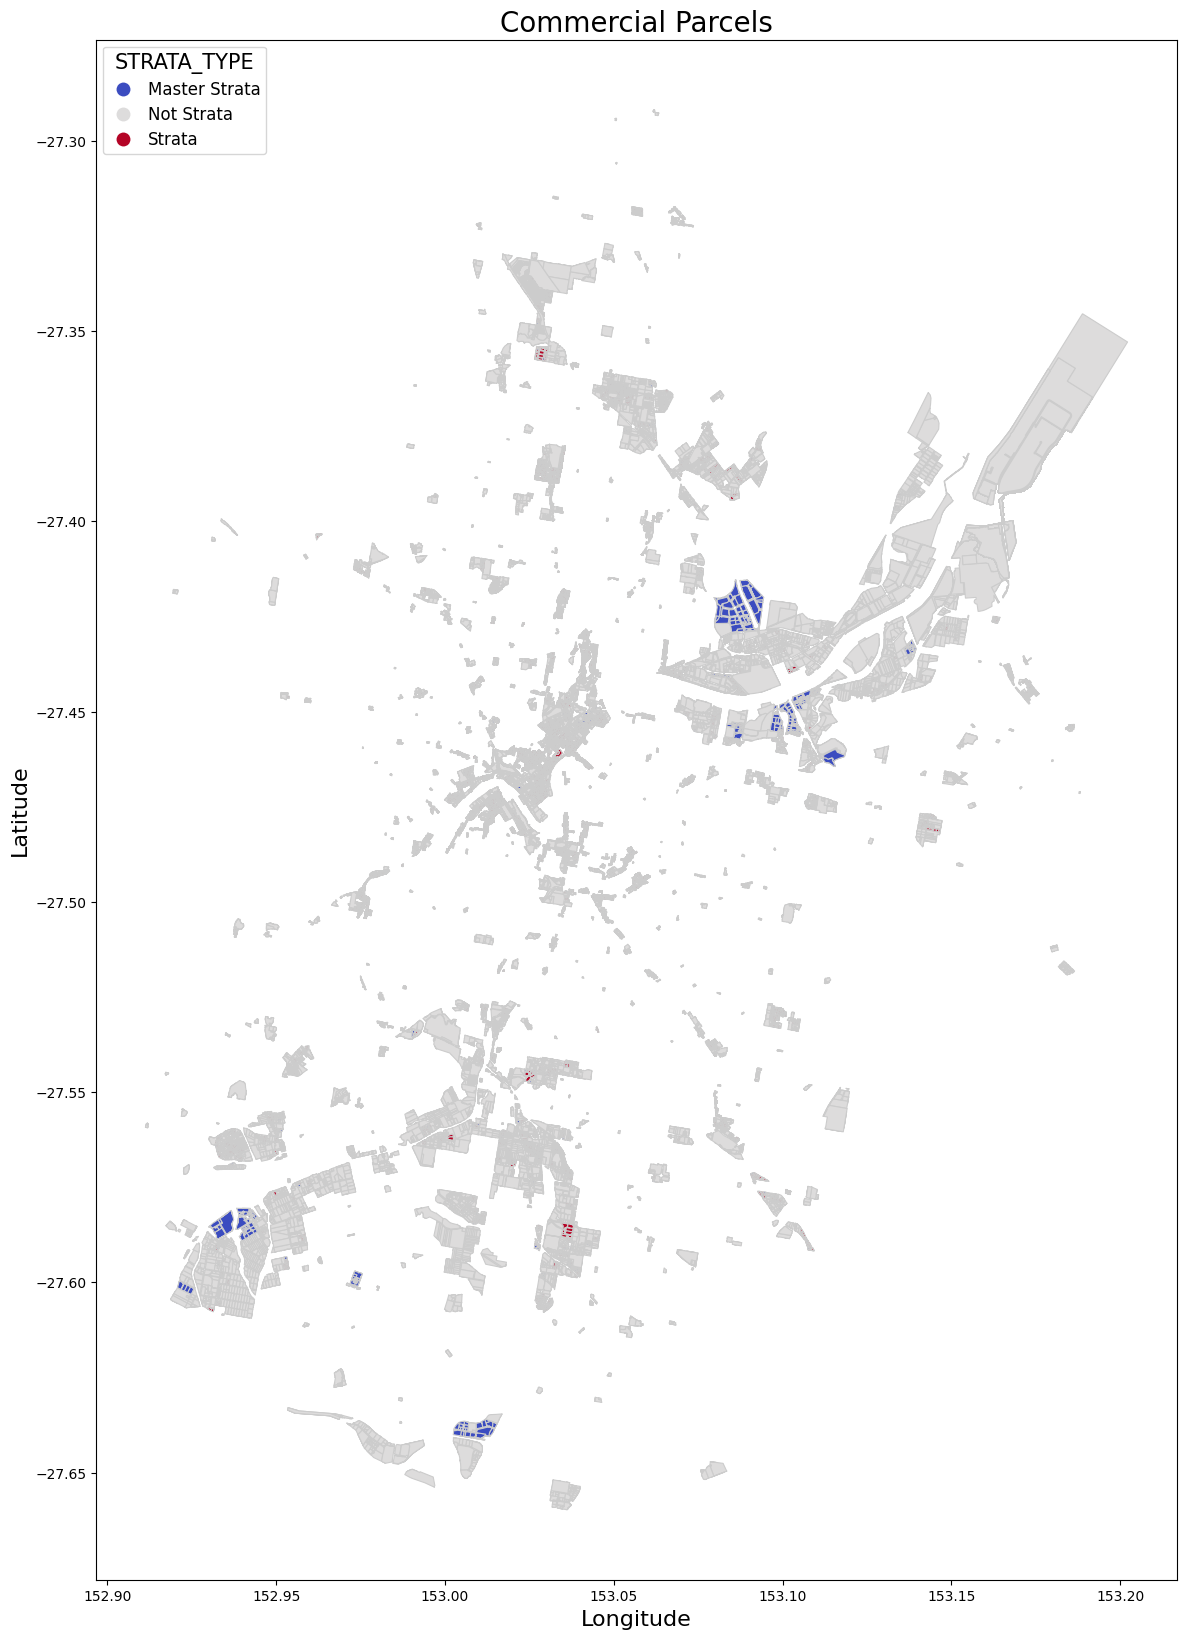

In [45]:
# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the GeoDataFrame with the specified column and legend
commercial_parcels_gdf.cx[152.9:153.2, :].plot(column='STRATA_TYPE', legend=True, ax=ax, figsize=(15, 15), cmap='coolwarm', linewidth=0.8, edgecolor='0.8')

# Customize the plot appearance
ax.set_title("Commercial Parcels", fontsize=20)
ax.set_xlabel("Longitude", fontsize=16)
ax.set_ylabel("Latitude", fontsize=16)

# Get the legend object created by commercial_zones_gdf.plot()
legend = ax.get_legend()
legend.set_title('STRATA_TYPE', prop={'size': 15})  # Set the legend title and its font size
for label in legend.get_texts():
    label.set_fontsize(12)  # Set the font size of legend labels
legend.set_loc('upper left')  # Set the legend position

# Show the plot
plt.show()

In [41]:
print(    "Count of Master Strata - ",    len(commercial_parcels_gdf[commercial_parcels_gdf["STRATA_TYPE"] == "Master Strata"]))
print(    "Count of Strata - ",    len(commercial_parcels_gdf[commercial_parcels_gdf["STRATA_TYPE"] == "Strata"]))
print(    "Count of Not Strata - ",    len(commercial_parcels_gdf[commercial_parcels_gdf["STRATA_TYPE"] == "Not Strata"]))

Count of Master Strata -  5735
Count of Strata -  125968
Count of Not Strata -  52932


## Cleaning strata geometry

In [42]:
#Question3
# Remove rows where 'StrataType' is 'Not Strata' and 'LOTPLAN' starts with '0'
commercial_parcels_gdf = commercial_parcels_gdf[~((commercial_parcels_gdf['STRATA_TYPE'] == 'Not Strata') & (commercial_parcels_gdf['LOTPLAN'].astype(str).str.startswith('0')))]

In [43]:
commercial_parcels_gdf.head()

,OBJECTID_1,LOT,PLAN_,LOTPLAN,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE
0,428983201,NaN,NaN,NaN,18072,81,18072081,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,WYNNUM ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004005,5.180885e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12577 -27.47447, 153.12557 -27.4...",Y,AL428983201,Not Strata
1,428986693,NaN,NaN,NaN,18072,345,18072345,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002248,1.471999e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12635 -27.47389, 153.12604 -27.4...",Y,AL428986693,Not Strata
2,429015502,NaN,NaN,NaN,18445,84,18445084,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,TENBAR STREET WYNNUM ROAD,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001518,1.470721e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"MULTIPOLYGON (((153.12557 -27.47445, 153.12557...",Y,AL429015502,Not Strata
3,429015545,NaN,NaN,NaN,18445,86,18445086,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,ROAD GORHAM STREET TENBAR STREET,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001022,6.244607e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12556 -27.47396, 153.12556 -27.4...",Y,AL429015545,Not Strata
4,429015549,NaN,NaN,NaN,18445,89,18445089,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,TENBAR STREET,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001265,8.632476e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.76709,302.26,"POLYGON ((153.12556 -27.47396, 153.12549 -27.4...",Y,AL429015549,Not Strata


In [44]:
#Removing master-strata parcels
commercial_parcels_gdf = commercial_parcels_gdf[((commercial_parcels_gdf['STRATA_TYPE'] == 'Strata') | (commercial_parcels_gdf['STRATA_TYPE'] == 'Not Strata'))]

In [45]:
commercial_parcels_gdf

,OBJECTID_1,LOT,PLAN_,LOTPLAN,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE
0,428983201,NaN,NaN,NaN,18072,81,18072081,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,WYNNUM ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004005,5.180885e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12577 -27.47447, 153.12557 -27.4...",Y,AL428983201,Not Strata
1,428986693,NaN,NaN,NaN,18072,345,18072345,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,ROAD,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002248,1.471999e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12635 -27.47389, 153.12604 -27.4...",Y,AL428986693,Not Strata
2,429015502,NaN,NaN,NaN,18445,84,18445084,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,TENBAR STREET WYNNUM ROAD,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001518,1.470721e-07,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"MULTIPOLYGON (((153.12557 -27.47445, 153.12557...",Y,AL429015502,Not Strata
3,429015545,NaN,NaN,NaN,18445,86,18445086,82,Intersection,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,NaN,ROAD GORHAM STREET TENBAR STREET,TINGALPA,I,INTERSECTION,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001022,6.244607e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12556 -27.47396, 153.12556 -27.4...",Y,AL429015545,Not Strata
4,429015549,NaN,NaN,NaN,18445,89,18445089,81,Road,0.0,0.0,0.0,NaN,NaN,NaN,BRISBANE CITY,TENBAR STREET,NaN,TINGALPA,R,ROAD,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001265,8.632476e-08,8938,1705924,1000,NaN,NaN,NaN,Centre,Neighbourhood centre,NaN,NaN,NaN,1.375315e+12,NaN,NC,NaN,NC - Neighbourhood centre,5893.767090,302.260000,"POLYGON ((153.12556 -27.47396, 153.12549 -27.4...",Y,AL429015549,Not Strata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184630,429597127,1,RP97188,1RP97188,20141,7,20141007,0,Lot,16590.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,NaN,NaN,COOPERS PLAINS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10573848.0,NS,STD,1800-01-01 00:00

In [73]:
# why pair wise dissolve only for strata parcels?
dissolved_commercial_parcel_gdf = commercial_parcels_gdf.dissolve(by=['LOTPLAN'])

In [74]:
dissolved_commercial_parcel_gdf = dissolved_commercial_parcel_gdf.reset_index()

In [75]:
dissolved_commercial_parcel_gdf .info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 94046 entries, 0 to 94045
Data columns (total 80 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   LOTPLAN                 94046 non-null  object             
 1   geometry                94046 non-null  geometry           
 2   OBJECTID_1              94046 non-null  int64              
 3   LOT                     94046 non-null  object             
 4   PLAN_                   94046 non-null  object             
 5   SEG_NUM                 94046 non-null  int64              
 6   PAR_NUM                 94046 non-null  int64              
 7   SEGPAR                  94046 non-null  int64              
 8   PAR_IND                 94046 non-null  int64              
 9   PAR_IND_DESC            94046 non-null  object             
 10  LOT_AREA                94046 non-null  float64            
 11  EXCL_AREA               39003 non

In [76]:
dissolved_commercial_parcel_gdf['LOTPLAN'].value_counts()

LOTPLAN
ZZZSP257561      1
10001SP224043    1
10001SP283436    1
10001SP302178    1
10002SP224043    1
                ..
1001SP227486     1
1001SP227497     1
1001SP229973     1
1001SP234022     1
1001SP234524     1
Name: count, Length: 94046, dtype: int64

In [77]:
dissolved_commercial_parcel_gdf

,LOTPLAN,geometry,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE
0,10001SP224043,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4...",429620195,10001,SP224043,18551,387,18551387,0,Lot,104.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320060.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:05+00:00,NaT,104.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089826.0,U,HAMILTON HARBOUR,None,8.0,None,10001.0,HARBOUR,RD,None,HAMILTON,4007.0,HAMILTON,QPP-EC,0.002754,1.107340e-07,23194,1720180,1000,NaN,None,None,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,1.375315e+12,NaN,PDA,1.0,"Northshore Hamilton Priority Development Area,...",17637.790771,563.082606,Y,AL429620195,Strata
1,10001SP283436,"POLYGON ((153.01458 -27.47734, 153.01458 -27.4...",429522852,10001,SP283436,25672,302,25672302,0,Lot,61.0,NaN,NaN,None,None,None,BRISBANE CITY,SKYNEEDLE,CMS52073,SOUTH BRISBANE,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11425427.0,S,BLD,2018-10-18 00:00:00+00:00,2018-11-01 10:21:27+00:00,NaT,62.0,48556.0,NaN,52073.0,SKYNEEDLE,1209576.0,U,SKYNEEDLE,None,16.0,None,10001.0,EDMONDSTONE,ST,None,SOUTH BRISBANE,4101.0,THE GABBA,QPP-PC1,0.001353,4.477167e-08,18496,1715482,1000,NaN,City centre,City centre,Centre,Principal centre (City centre),NaN,NaN,NaN,NaN,NaN,PC,1.0,PC1 - Principal centre (City centre),10931.703857,422.787816,Y,AL429522852,Strata
2,10001SP302178,"POLYGON ((153.00118 -27.48574, 153.00121 -27.4...",429490767,10001,SP302178,13756,155,13756155,0,Lot,20.0,NaN,NaN,None,None,None,BRISBANE CITY,MONTAGUE MARKETS NORTH,CMS53857,WEST END,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11443091.0,S,BLD,2020-08-11 00:00:00+00:00,2020-09-03 13:09:02+00:00,NaT,20.0,50371.0,NaN,53857.0,MONTAGUE MARKETS NORTH,1227445.0,U,MONTAGUE MARKETS NORTH,None,405.0,None,10001.0,MONTAGUE,RD,None,WEST END,4101.0,THE GABBA,"QPP-HDR1,QPP-MU3",0.002032,1.103326e-07,4905,1701891,1000,NaN,Corridor,Corridor,Mixed use,Mixed use (Corridor),NaN,NaN,NaN,1.375315e+12,NaN,MU,3.0,MU3 - Corridor,7155.479004,477.718454,Y,AL429490767,Strata
3,10002SP224043,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4...",429481242,10002,SP224043,18551,387,18551387,0,Lot,54.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320061.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:07+00:00,NaT,54.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089827.0,U,HAMILTON HARBOUR,None,8.0,None,10002.0,HARBOUR,RD,None,HAMILTON,4007.0,HAMILTON,QPP-EC,0.002754,1.107340e-07,23194,1720180,1000,NaN,None,None,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,1.375315e+12,NaN,PDA,1.0,"Northshore Hamilton Priority Development Area,...",17637.790771,563.082606,Y,AL429481242,Strata
4,10003SP224043,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4...",429388347,10003,SP224043,18551,387,18551387,0,Lot,64.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320062.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:08+00:00,NaT,64.0,39617

In [78]:
commercial_buildings_gdf

,id,OBJECTID,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,geometry,COMMERCIAL_BUILDINGS
0,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.864990,1587.801728,"POLYGON ((152.94142 -27.58992, 152.94156 -27.5...",Y
1,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.864990,1587.801728,"POLYGON ((152.94329 -27.58928, 152.94323 -27.5...",Y
2,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.864990,1587.801728,"POLYGON ((152.94125 -27.58984, 152.94136 -27.5...",Y
3,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.864990,1587.801728,"MULTIPOLYGON (((152.94536 -27.58809, 152.94532...",Y
4,12572,1709558,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,NaN,II - Industry investigation,117814.864990,1587.801728,"POLYGON ((152.94051 -27.59008, 152.94052 -27.5...",Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16473,3618,1700604,1000,NaN,Corridor,Corridor,Centre,District centre (Corridor),NaN,NaN,NaN,1.375315e+12,NaN,DC,2.0,DC2 - Corridor,7258.870605,353.402028,"POLYGON ((153.06110 -27.51930, 153.06095 -27.5...",Y
16474,2978,1699964,1000,NaN,NaN,NaN,Industry,Industry investigation,NaN,NaN,NaN,1.375315e+12,NaN,II,NaN,II - Industry investigation,40468.317383,804.669020,"POLYGON ((153.13987 -27.38670, 153.13975 -27.3...",Y
16475,16014,1713000,1000,NaN,Large format retail,Large format retail,Specialised centre,Specialised centre (Large format retail),NaN,NaN,NaN,1.375315e+12,NaN,SC,4.0,SC4 - Specialised centre (Large format retail),9822.119385,404.037980,"POLYGON ((153.07523 -27.53310, 153.07528 -27.5...",Y
16476,21674,1718660,1000,NaN,NaN,NaN,Industry,General industry C,NaN,NaN,NaN,1.375315e+12,NaN,IN,3.0,IN3 - General industry C,35702.279053,743.467099,"POLYGON ((153.08456 -27.42426, 153.08450 -27.4...",Y


In [79]:
commercial_parcels_non_strata_gdf = dissolved_commercial_parcel_gdf[dissolved_commercial_parcel_gdf['STRATA_TYPE'] == 'Not Strata']
non_strata_buildings_output =  gpd.overlay(gpd.GeoDataFrame(commercial_buildings_gdf['geometry']),commercial_parcels_non_strata_gdf, how='intersection',keep_geom_type=True)


/home/zadmin/Arealytics/env/lib/python3.10/site-packages/geopandas/geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


In [80]:
non_strata_buildings_output

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry
0,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94156 -27.59017, 152.94147 -27.5..."
1,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94136 -27.58979, 152.94141 -27.5..."
2,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94155 -27.58982, 152.94166 -27.5..."
3,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94323 -27.58916, 152.94336 -27.5..."
4,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94312 -27.58911, 152.94318 -27.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [81]:
non_strata_buildings_output.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33382 entries, 0 to 33381
Data columns (total 80 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   LOTPLAN                 33382 non-null  object             
 1   OBJECTID_1              33382 non-null  int64              
 2   LOT                     33382 non-null  object             
 3   PLAN_                   33382 non-null  object             
 4   SEG_NUM                 33382 non-null  int64              
 5   PAR_NUM                 33382 non-null  int64              
 6   SEGPAR                  33382 non-null  int64              
 7   PAR_IND                 33382 non-null  int64              
 8   PAR_IND_DESC            33382 non-null  object             
 9   LOT_AREA                33382 non-null  float64            
 10  EXCL_AREA               33274 non-null  float64            
 11  LOT_VOLUME              33274 non

In [82]:
non_strata_buildings_output

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry
0,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94156 -27.59017, 152.94147 -27.5..."
1,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94136 -27.58979, 152.94141 -27.5..."
2,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94155 -27.58982, 152.94166 -27.5..."
3,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94323 -27.58916, 152.94336 -27.5..."
4,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94312 -27.58911, 152.94318 -27.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [83]:
area = non_strata_buildings_output.copy().to_crs({'proj':'cea'}).area
non_strata_buildings_output['Area'] = area

In [84]:
non_strata_buildings_output = non_strata_buildings_output[non_strata_buildings_output['Area'] >= 100]

In [85]:
non_strata_buildings_output

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry,Area
0,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94156 -27.59017, 152.94147 -27.5...",291.447663
1,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94136 -27.58979, 152.94141 -27.5...",150.366333
3,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94323 -27.58916, 152.94336 -27.5...",179.578213
4,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94312 -27.58911, 152.94318 -27.5...",132.477421
6,132RP880160,429160734,132,RP880160,1007,187,1007187,0,Lot,3367.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10888400.0,NS,STD,1994-11-23 00:00:00+00:00,1997-06-01 14:09:05+00:00,NaT,3367.0,12028.0,NaN,NaN,None,598436.0,H,None,None,81.0,None,NaN,FULCRUM,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IN3,0.002331,3.099440e-07,19418,1716404,1000,NaN,None,None,Industry,General industry C,NaN,NaN,NaN,1.375315e+12,NaN,IN,3.0,IN3 - General industry C,46579.909912,1532.332134,Y,AL429160734,Not Strata,"POLYGON ((152.94593 -27.58784, 152.94586 -27.5...",1722.140736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [86]:
centroids = non_strata_buildings_output.geometry.copy().to_crs({'proj':'cea'}).centroid
non_strata_buildings_output['Centroid'] = centroids

/home/zadmin/Arealytics/env/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [87]:
non_strata_buildings_output

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry,Area,Centroid
0,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94156 -27.59017, 152.94147 -27.5...",291.447663,POINT (17025363.577 -2937022.586)
1,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94136 -27.58979, 152.94141 -27.5...",150.366333,POINT (17025351.131 -2937003.441)
3,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94323 -27.58916, 152.94336 -27.5...",179.578213,POINT (17025572.652 -2936937.583)
4,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94312 -27.58911, 152.94318 -27.5...",132.477421,POINT (17025559.469 -2936931.177)
6,132RP880160,429160734,132,RP880160,1007,187,1007187,0,Lot,3367.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10888400.0,NS,STD,1994-11-23 00:00:00+00:00,1997-06-01 14:09:05+00:00,NaT,3367.0,12028.0,NaN,NaN,None,598436.0,H,None,None,81.0,None,NaN,FULCRUM,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IN3,0.002331,3.099440e-07,19418,1716404,1000,NaN,None,None,Industry,General industry C,NaN,NaN,NaN,1.375315e+12,NaN,IN,3.0,IN3 - General industry C,46579.909912,1532.332134,Y

In [88]:
strata_buildings_output = dissolved_commercial_parcel_gdf [dissolved_commercial_parcel_gdf ['STRATA_TYPE'] == 'Strata']

In [89]:
columns = list(strata_buildings_output.columns)
# Remove the second column from the list
second_column_index = columns.index('geometry')
columns.pop(second_column_index)

# Append the second column at the end of the list
columns.append('geometry')

# Reorder the columns in the GeoDataFrame
strata_buildings_output = strata_buildings_output[columns]

In [90]:
strata_buildings_output

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry
0,10001SP224043,429620195,10001,SP224043,18551,387,18551387,0,Lot,104.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320060.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:05+00:00,NaT,104.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089826.0,U,HAMILTON HARBOUR,None,8.0,None,10001.0,HARBOUR,RD,None,HAMILTON,4007.0,HAMILTON,QPP-EC,0.002754,1.107340e-07,23194,1720180,1000,NaN,None,None,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,1.375315e+12,NaN,PDA,1.0,"Northshore Hamilton Priority Development Area,...",17637.790771,563.082606,Y,AL429620195,Strata,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4..."
1,10001SP283436,429522852,10001,SP283436,25672,302,25672302,0,Lot,61.0,NaN,NaN,None,None,None,BRISBANE CITY,SKYNEEDLE,CMS52073,SOUTH BRISBANE,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11425427.0,S,BLD,2018-10-18 00:00:00+00:00,2018-11-01 10:21:27+00:00,NaT,62.0,48556.0,NaN,52073.0,SKYNEEDLE,1209576.0,U,SKYNEEDLE,None,16.0,None,10001.0,EDMONDSTONE,ST,None,SOUTH BRISBANE,4101.0,THE GABBA,QPP-PC1,0.001353,4.477167e-08,18496,1715482,1000,NaN,City centre,City centre,Centre,Principal centre (City centre),NaN,NaN,NaN,NaN,NaN,PC,1.0,PC1 - Principal centre (City centre),10931.703857,422.787816,Y,AL429522852,Strata,"POLYGON ((153.01458 -27.47734, 153.01458 -27.4..."
2,10001SP302178,429490767,10001,SP302178,13756,155,13756155,0,Lot,20.0,NaN,NaN,None,None,None,BRISBANE CITY,MONTAGUE MARKETS NORTH,CMS53857,WEST END,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11443091.0,S,BLD,2020-08-11 00:00:00+00:00,2020-09-03 13:09:02+00:00,NaT,20.0,50371.0,NaN,53857.0,MONTAGUE MARKETS NORTH,1227445.0,U,MONTAGUE MARKETS NORTH,None,405.0,None,10001.0,MONTAGUE,RD,None,WEST END,4101.0,THE GABBA,"QPP-HDR1,QPP-MU3",0.002032,1.103326e-07,4905,1701891,1000,NaN,Corridor,Corridor,Mixed use,Mixed use (Corridor),NaN,NaN,NaN,1.375315e+12,NaN,MU,3.0,MU3 - Corridor,7155.479004,477.718454,Y,AL429490767,Strata,"POLYGON ((153.00118 -27.48574, 153.00121 -27.4..."
3,10002SP224043,429481242,10002,SP224043,18551,387,18551387,0,Lot,54.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320061.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:07+00:00,NaT,54.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089827.0,U,HAMILTON HARBOUR,None,8.0,None,10002.0,HARBOUR,RD,None,HAMILTON,4007.0,HAMILTON,QPP-EC,0.002754,1.107340e-07,23194,1720180,1000,NaN,None,None,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,1.375315e+12,NaN,PDA,1.0,"Northshore Hamilton Priority Development Area,...",17637.790771,563.082606,Y,AL429481242,Strata,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4..."
4,10003SP224043,429388347,10003,SP224043,18551,387,18551387,0,Lot,64.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320062.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:08+00:00,NaT,64.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089828.0,U,HAMILTON

In [91]:
area = strata_buildings_output.copy().to_crs({'proj':'cea'}).area
strata_buildings_output['Area'] = area

In [92]:
strata_buildings_output['Centroid'] = strata_buildings_output.to_crs({'proj':'cea'}).centroid

In [93]:
strata_buildings_output

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry,Area,Centroid
0,10001SP224043,429620195,10001,SP224043,18551,387,18551387,0,Lot,104.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320060.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:05+00:00,NaT,104.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089826.0,U,HAMILTON HARBOUR,None,8.0,None,10001.0,HARBOUR,RD,None,HAMILTON,4007.0,HAMILTON,QPP-EC,0.002754,1.107340e-07,23194,1720180,1000,NaN,None,None,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,1.375315e+12,NaN,PDA,1.0,"Northshore Hamilton Priority Development Area,...",17637.790771,563.082606,Y,AL429620195,Strata,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4...",1213.133755,POINT (17039319.382 -2922230.186)
1,10001SP283436,429522852,10001,SP283436,25672,302,25672302,0,Lot,61.0,NaN,NaN,None,None,None,BRISBANE CITY,SKYNEEDLE,CMS52073,SOUTH BRISBANE,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11425427.0,S,BLD,2018-10-18 00:00:00+00:00,2018-11-01 10:21:27+00:00,NaT,62.0,48556.0,NaN,52073.0,SKYNEEDLE,1209576.0,U,SKYNEEDLE,None,16.0,None,10001.0,EDMONDSTONE,ST,None,SOUTH BRISBANE,4101.0,THE GABBA,QPP-PC1,0.001353,4.477167e-08,18496,1715482,1000,NaN,City centre,City centre,Centre,Principal centre (City centre),NaN,NaN,NaN,NaN,NaN,PC,1.0,PC1 - Principal centre (City centre),10931.703857,422.787816,Y,AL429522852,Strata,"POLYGON ((153.01458 -27.47734, 153.01458 -27.4...",844.538317,POINT (17033485.888 -2925937.698)
2,10001SP302178,429490767,10001,SP302178,13756,155,13756155,0,Lot,20.0,NaN,NaN,None,None,None,BRISBANE CITY,MONTAGUE MARKETS NORTH,CMS53857,WEST END,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11443091.0,S,BLD,2020-08-11 00:00:00+00:00,2020-09-03 13:09:02+00:00,NaT,20.0,50371.0,NaN,53857.0,MONTAGUE MARKETS NORTH,1227445.0,U,MONTAGUE MARKETS NORTH,None,405.0,None,10001.0,MONTAGUE,RD,None,WEST END,4101.0,THE GABBA,"QPP-HDR1,QPP-MU3",0.002032,1.103326e-07,4905,1701891,1000,NaN,Corridor,Corridor,Mixed use,Mixed use (Corridor),NaN,NaN,NaN,1.375315e+12,NaN,MU,3.0,MU3 - Corridor,7155.479004,477.718454,Y,AL429490767,Strata,"POLYGON ((153.00118 -27.48574, 153.00121 -27.4...",1078.398739,POINT (17032027.957 -2926762.211)
3,10002SP224043,429481242,10002,SP224043,18551,387,18551387,0,Lot,54.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS42979,HAMILTON,L,LOT,S,STRATA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11320061.0,S,BLD,2011-09-30 00:00:00+00:00,2011-10-19 12:30:07+00:00,NaT,54.0,39617.0,NaN,42979.0,HAMILTON HARBOUR,1089827.0,U,HAMILTON HARBOUR,None,8.0,None,10002.0,HARBOUR,RD,None,HAMILTON,4007.0,HAMILTON,QPP-EC,0.002754,1.107340e-07,23194,1720180,1000,NaN,None,None,Planning scheme,Priority Development Area - Part 10 of Brisban...,NaN,NaN,NaN,1.375315e+12,NaN,PDA,1.0,"Northshore Hamilton Priority Development Area,...",17637.790771,563.082606,Y,AL429481242,Strata,"POLYGON ((153.06654 -27.43955, 153.06653 -27.4...",1213.133755,POINT (17039319.382 -2922230.186)
4,10003SP224043,429388347,10003,SP224043,18551,387,18551387,0,Lot,64.0,NaN,NaN,None,None,None,BRISBANE CITY,HAMILTON HARBOUR,CMS

In [68]:
# Concatenate two GeoDataFrames along the rows
concatenated_gdf = pd.concat([non_strata_buildings_output, strata_buildings_output], ignore_index=True)

# If you want to reset the index in the resulting GeoDataFrame
concatenated_gdf.reset_index(drop=True, inplace=True)

In [70]:
concatenated_gdf

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry,Area,Centroid
0,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94156 -27.59017, 152.94147 -27.5...",291.447663,POINT (17025363.577 -2937022.586)
1,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94136 -27.58979, 152.94141 -27.5...",150.366333,POINT (17025351.131 -2937003.441)
2,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94323 -27.58916, 152.94336 -27.5...",179.578213,POINT (17025572.652 -2936937.583)
3,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94312 -27.58911, 152.94318 -27.5...",132.477421,POINT (17025559.469 -2936931.177)
4,132RP880160,429160734,132,RP880160,1007,187,1007187,0,Lot,3367.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10888400.0,NS,STD,1994-11-23 00:00:00+00:00,1997-06-01 14:09:05+00:00,NaT,3367.0,12028.0,NaN,NaN,None,598436.0,H,None,None,81.0,None,NaN,FULCRUM,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IN3,0.002331,3.099440e-07,19418,1716404,1000,NaN,None,None,Industry,General industry C,NaN,NaN,NaN,1.375315e+12,NaN,IN,3.0,IN3 - General industry C,46579.909912,1532.332134,Y

In [70]:
# Generate values for the new column 'NewColumn'
n_values = range(1, len(concatenated_gdf) + 1)
new_column_values = ['Alb{}'.format(n) for n in n_values]

# Add the new column to the GeoDataFrame
concatenated_gdf['AL_PID'] = new_column_values


In [71]:
concatenated_gdf

,LOTPLAN,OBJECTID_1,LOT,PLAN_,SEG_NUM,PAR_NUM,SEGPAR,PAR_IND,PAR_IND_DESC,LOT_AREA,EXCL_AREA,LOT_VOLUME,SURV_IND,TENURE,TENURE_DESC,SHIRE_NAME,FEAT_NAME,ALIAS_NAME,LOCALITY,PARCEL_TYP,PARCEL_TYP_DESC,COVER_TYP,COVER_TYP_DESC,TENCODE,TENCODE_DESC,CODE,TENTYPE,CATEGORY,CATEGORY_DESC,TAS_ID,COMMENCE,LOT_ID,LOT_TYPE,LOT_FORMAT,PLAN_REGISTRATION_DATE,LOT_CREATION_DATE,LOT_RETIREMENT_DATE,LOT_TITLE_AREA,CREATING_SUBDIV_ID,RETIRING_SUBDIV_ID,CMS_NUMBER,CMS_NAME,PROPERTY_ID,PROPERTY_TYPE,PROPERTY_NAME_1,PROPERTY_NAME_2,HOUSE_NUMBER,HOUSE_NUMBER_SUFFIX,UNIT_NUMBER,CORRIDOR_NAME,CORRIDOR_SUFFIX_CODE,CORRIDOR_OTHER_SUFFIX,SUBURB,POSTCODE,WARD_NAME,CITY_PLAN_AREA,SHAPE_Length,SHAPE_Area,id,OBJECTID_2,LGA_CODE,NP,NP_PREC,ZONE_PREC,LVL1_ZONE,LVL2_ZONE,LOT_PLAN,GAZ_DATE,AMD_DATE,CAD_VER,PAR_SPLIT,ZONE_CODE,ZONE_PREC_NO,ZONE_PREC_DESC,Shape__Area,Shape__Length,COMMERCIAL_PARCEL,AL_LID,STRATA_TYPE,geometry,Area,Centroid,‘AL_PID
0,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94156 -27.59017, 152.94147 -27.5...",291.447663,POINT (17025363.577 -2937022.586),Alb1
1,169RP86573,429511916,169,RP86573,1007,9,1007009,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552730.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:06+00:00,NaT,10117.0,NaN,NaN,NaN,None,369410.0,H,None,None,40.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004743,9.268437e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429511916,Not Strata,"POLYGON ((152.94136 -27.58979, 152.94141 -27.5...",150.366333,POINT (17025351.131 -2937003.441),Alb2
2,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94323 -27.58916, 152.94336 -27.5...",179.578213,POINT (17025572.652 -2936937.583),Alb3
3,165RP86573,429697294,165,RP86573,1007,5,1007005,0,Lot,10120.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10552737.0,NS,STD,1800-01-01 00:00:00+00:00,1997-05-31 20:21:07+00:00,NaT,10117.0,NaN,NaN,NaN,None,1240922.0,H,None,None,72.0,None,NaN,BANDARA,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IIA,0.004746,9.295649e-07,12572,1709558,1000,NaN,None,None,Industry,Industry investigation,NaN,NaN,NaN,NaN,NaN,II,1.0,II - Industry investigation,117814.864990,1587.801728,Y,AL429697294,Not Strata,"POLYGON ((152.94312 -27.58911, 152.94318 -27.5...",132.477421,POINT (17025559.469 -2936931.177),Alb4
4,132RP880160,429160734,132,RP880160,1007,187,1007187,0,Lot,3367.0,0.0,0.0,Y,FH,Freehold,BRISBANE CITY,None,None,RICHLANDS,L,LOT,B,BASE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10888400.0,NS,STD,1994-11-23 00:00:00+00:00,1997-06-01 14:09:05+00:00,NaT,3367.0,12028.0,NaN,NaN,None,598436.0,H,None,None,81.0,None,NaN,FULCRUM,ST,None,RICHLANDS,4077.0,JAMBOREE,QPP-IN3,0.002331,3.099440e-07,19418,1716404,1000,NaN,None,None,Industry,General industry C,NaN,NaN,NaN,1.375315e+12,NaN,IN,3.0,IN3 - General industry 

In [94]:
commercial_addresses.sindex

In [95]:
concatenated_gdf.sindex

In [ ]:
commercial_address_building_intersect = gpd.overlay(commercial_addresses,concatenated_gdf, how='intersection')

In [1]:
commercial_address_building_intersect

NameError: name 'commercial_address_building_intersect' is not defined

In [71]:
commercial_addresses.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
concatenated_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich